<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Exploratory Data Analysis with Tidyverse


Estimated Time Needed: **40 min**

<h3>Welcome!</h3>
In this section, we will explore several methods to see if certain characteristics or features can be used to predict arrival delay minutes. The main question we will be trying to answer throughout this lab is: what are the main characteristics which have the most impact on how long a flight arrives late?


## Table of Contents

*   [1. Analyzing Individual Feature Patterns using Visualization](#pattern_visualization)
*   [2. Descriptive Statistical Analysis](#discriptive_statistics)
*   [3. Basics of Grouping](#basic_grouping)
*   [4. Correlation and Causation](#correlation_causation)
*   [5. ANOVA](#anova)


<a class="anchor" id="import_data"></a>

## Load Libraries and Data


First, load the tidyverse library. This lab will use `ggplot` which is already loaded when `tidyverse` is loaded.


In [1]:
# Load tidyverse
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


The original Airline dataset is hosted on <a href="https://developer.ibm.com/exchanges/data/all/airline/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2022-01-01">IBM Data Asset eXchange</a>. This sample dataset can be found <a href="https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2022-01-01">here</a>.

Now using the subset dataset link, you can load it and store as a dataframe `sub_airline`:


In [2]:
# url where the data is located
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz"

# download the file
download.file(url, destfile = "lax_to_jfk.tar.gz")

# untar the file so we can get the csv only
# if you run this on your local machine, then can remove tar = "internal" 
untar("lax_to_jfk.tar.gz", tar = "internal")

# read_csv only 
sub_airline <- read_csv("lax_to_jfk/lax_to_jfk.csv",
                     col_types = cols('DivDistance' = col_number(), 
                                      'DivArrDelay' = col_number()))

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

<a class="anchor" id="pattern_visualization"></a>

## 1. Analyzing Individual Feature Patterns using Visualization

Boxplots are a great way to visualize numeric (or quantitative) data, since you can visualize the various distributions of the data. They are similar to histograms but can show more informatioin such as:

*   The median of the data, which represents the middle datapoint
*   The Upper Quartile, which is the 75th percentile
*   The Lower Quartile, which is the 25th percentile
*   The Interquartile Range, which is the data between the Upper and Lower Quartile

Boxplots also display outliers as individual dots that occur outside the upper and lower extremes. With boxplots, you can easily spot outliers and also see the distribution and skewness of the data.


You will use the `ggplot` library to create plots, which is already loaded when the `tidyverse` library is loaded.

To create boxplots, the main function to use is `geom_boxplot()`. In the below code we also use additional functions primarly to customize the aesthetics of the plot. You can check out the Data Visualization Course in R if you want to know more about customizing plots with `ggplot`.

*   `geom_boxplot()`: The boxplot compactly displays the distribution of a continuous variable. It visualises five summary statistics (the median, two hinges and two whiskers), and all "outlying" points individually.
*   `geom_jitter()`: The jitter geom is a convenient shortcut for geom_point(position = "jitter"). It adds a small amount of random variation to the location of each point, and is a useful way of handling overplotting caused by discreteness in smaller datasets.
*   `ggtitle()`: Modifies plot titles (main title, axis labels and legend titles).
*   `guides()`: Guides for each scale can be set scale-by-scale with the guide argument.
*   `theme_minimal()`: A minimalistic theme with no background annotations.
*   `coord_cartesian()`: The Cartesian coordinate system is the most familiar, and common, type of coordinate system. Setting limits on the coordinate system will zoom the plot (like you're looking at it with a magnifying glass), and will not change the underlying data like setting limits on a scale will.

Below shows the distribution of arrival delays for each reporting airline. So here, ArrDelay is the numerica data.


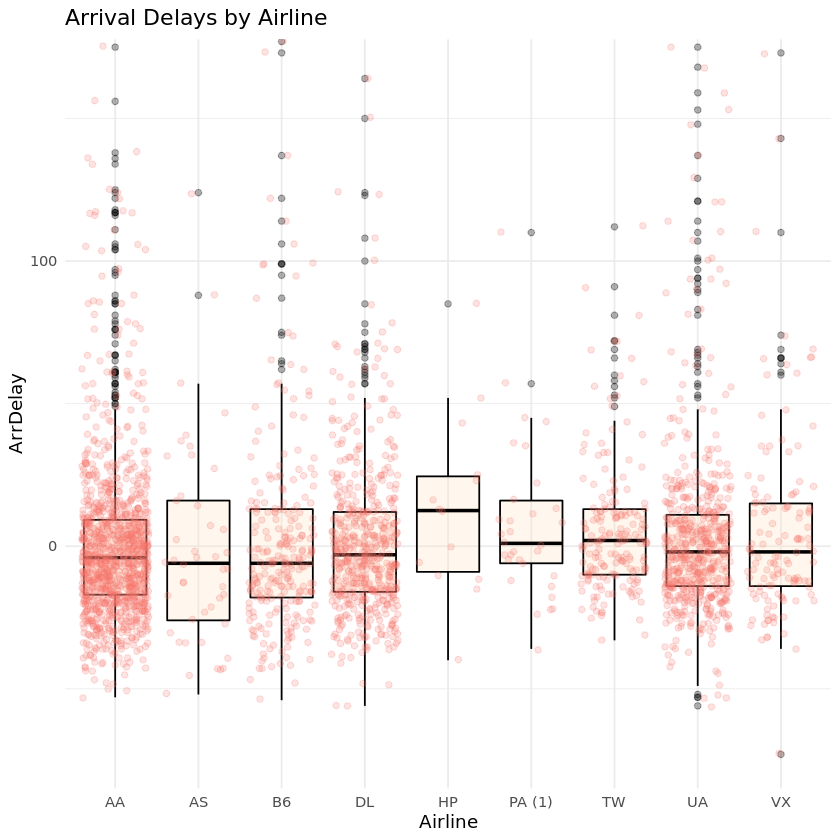

In [3]:
# Boxplot
ggplot(data = sub_airline, mapping = aes(x = Reporting_Airline, y = ArrDelay)) +
  geom_boxplot(fill = "bisque",color = "black", alpha = 0.3) +
  geom_jitter(aes(color = 'blue'), alpha=0.2) +
  labs(x = "Airline") +
  ggtitle("Arrival Delays by Airline") +
  guides(color = FALSE) +
  theme_minimal() +
  coord_cartesian(ylim = quantile(sub_airline$ArrDelay, c(0, 0.99)))

Often times we see continuous variables in our data. These data points are numbers contained in some range.

For example, in our dataset, departure delays and arrival delays are continuous numeric variables. What if we want to understand the relationship between “DepDelay” and ”ArrDelay”? Could departure delay possibly predict arrival delay?

One good way to visualize two continuous variables is to use a scatter plot. Each observation in a scatter plot is represented as a point.

Using `ggplot`, you can input the two continuous variables to compare and add `gemo_point()` to show the points in a scatter plot.


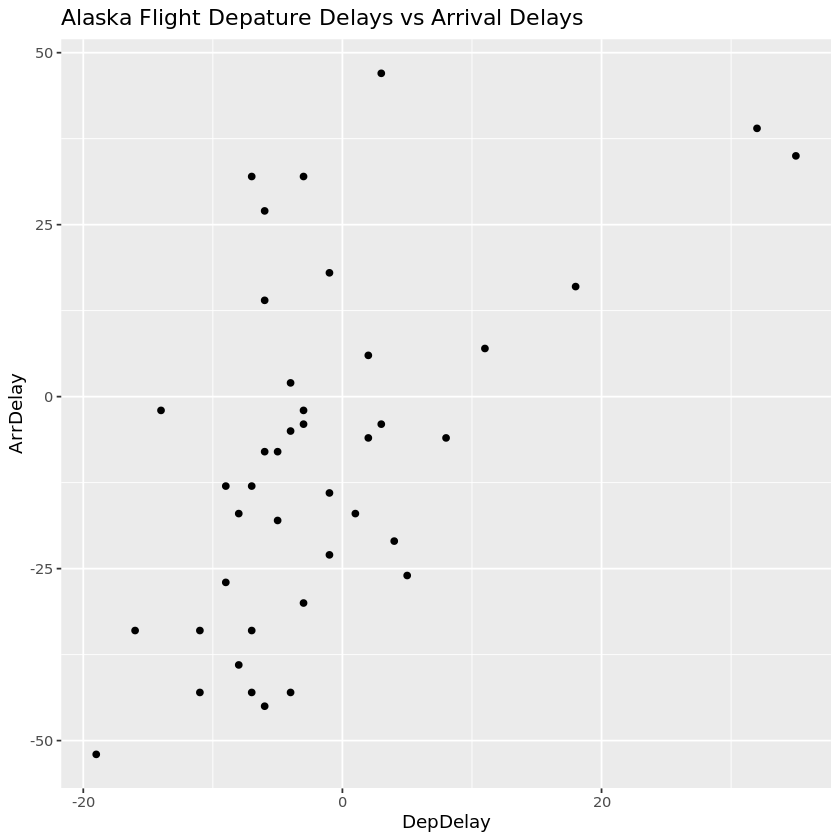

In [4]:
# Load Alaska data, deleting rows that have missing departure delay or arrival delay data
alaska_flights <- sub_airline %>%
  filter(Reporting_Airline == "AS") %>%
  filter(!is.na(DepDelay) & !is.na(ArrDelay)) %>%
  filter(DepDelay < 40)

ggplot(data = alaska_flights, mapping = aes(x = DepDelay, y = ArrDelay)) +
   geom_point() +
   ggtitle("Alaska Flight Depature Delays vs Arrival Delays")

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.
Below is a way to show each variable and their type in a dataframe.
</p>


In [5]:
# list the data types for each column
str(sub_airline)

tibble [2,855 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Month            : num [1:2855] 3 11 8 4 11 4 12 12 2 3 ...
 $ DayOfWeek        : num [1:2855] 5 4 5 7 3 1 1 3 4 4 ...
 $ FlightDate       : Date[1:2855], format: "2003-03-28" "2018-11-29" ...
 $ Reporting_Airline: chr [1:2855] "UA" "AS" "UA" "DL" ...
 $ Origin           : chr [1:2855] "LAX" "LAX" "LAX" "LAX" ...
 $ Dest             : chr [1:2855] "JFK" "JFK" "JFK" "JFK" ...
 $ CRSDepTime       : chr [1:2855] "2210" "1045" "0805" "2205" ...
 $ CRSArrTime       : chr [1:2855] "0615" "1912" "1634" "0619" ...
 $ DepTime          : chr [1:2855] "2209" "1049" "0757" "2212" ...
 $ ArrTime          : chr [1:2855] "0617" "1851" "1620" "0616" ...
 $ ArrDelay         : num [1:2855] 2 -21 -14 -3 -13 -20 1 -40 25 7 ...
 $ ArrDelayMinutes  : num [1:2855] 2 0 0 0 0 0 1 0 25 7 ...
 $ CarrierDelay     : num [1:2855] NA NA NA NA NA NA NA NA NA NA ...
 $ WeatherDelay     : num [1:2855] NA NA NA NA NA NA NA NA NA NA ...
 $ NASDelay         : 

Now, we turn our focus to "ArrDelayMinutes" as we want to create models to predict this variable in lab 4.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #1:</h1>

<b>What is the data type of the column "ArrDelayMinutes"? </b>

</div>


In [6]:
# Write your code below and press Shift+Enter to execute 
str(sub_airline$ArrDelayMinutes)

 num [1:2855] 2 0 0 0 0 0 1 0 25 7 ...


<details>
    <summary>Click here for the solution.</summary>

```r
numerical (num)
```

</details>


Next, let's take a look at other variables, like "DepDelayMinutes" that could potentially help predict "ArrDelayMinutes".


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<p>Find the correlation between the following columns: DepDelayMinutes and ArrDelayMinutes.</p>
<p>Hint: if you would like to select those columns, use the dollar sign ($) </p>
</div>


In [8]:
# Write your code below and press Shift+Enter to execute 
cor(sub_airline$DepDelayMinutes, sub_airline$ArrDelayMinutes)

[1] 0.9213328

<details>
    <summary>Click here for the solution.</summary>

```r
cor(sub_airline$DepDelayMinutes, sub_airline$ArrDelayMinutes)
```

</details>


<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. In R, continuous numerical variables can have the type "integer" or "numeric" (these are real numbers and sometimes are called "float" in other programming languages). A great way to visualize these variables is by using scatterplots with fitted lines.</p>

With `ggplot`, we can visualize this by using `geom_point()` to plot the data points and `geom_smooth()` to plot a fitted linear regression line (by default the model uses `formula = y ~ x`).


Let's see several examples of different linear relationships:


<h3>Positive linear relationship</h3>


Let's find the scatterplot of "DepDelayMinutes" and "ArrDelayMinutes" of all airlines.


`geom_smooth()` using formula 'y ~ x'


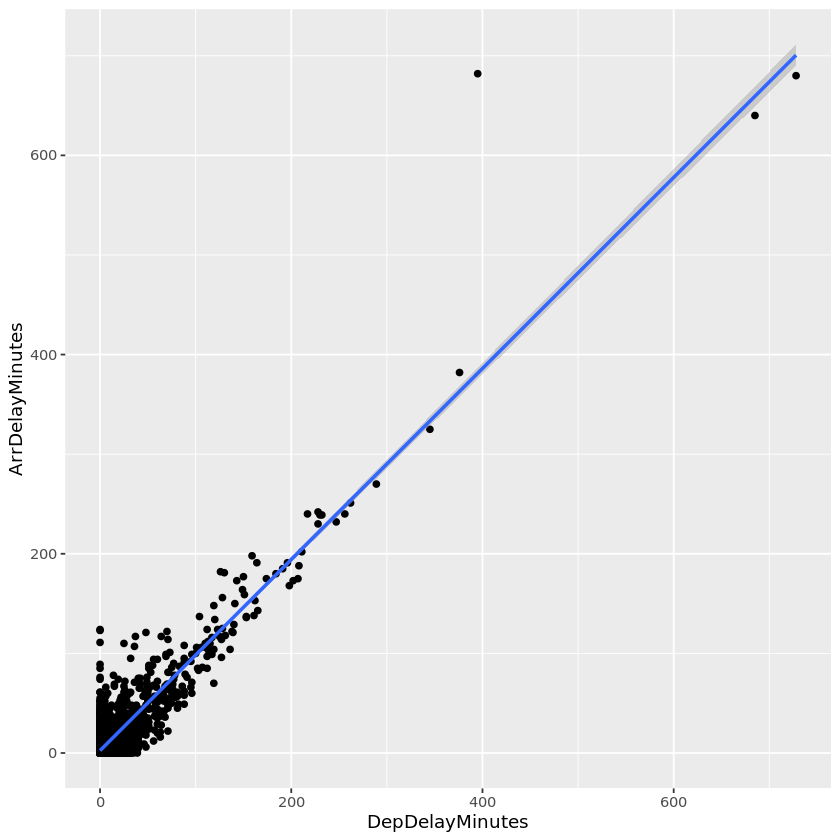

In [10]:
# DepDelayMinutes as potential predictor variable of ArrDelayMinutes
ggplot(data = sub_airline, mapping = aes(x = DepDelayMinutes, y = ArrDelayMinutes)) +
    geom_point() + 
    geom_smooth(method = "lm", na.rm = TRUE)

<p>From the plot, as the depature delay ("DepDelayMinutes") increases, the arrival delay ("ArrDelayMinutes") increases. This indicates a positive direct correlation between these two variables. "DepDelayMinutes" may be a decent predictor of "ArrDelayMinutes" since the regression line is increasing and generally matches the data points.</p>


Next, we can examine the correlation between "DepDelayMinutes" and "ArrDelayMinutes" and see it's approximately  0.92


In [11]:
cor(sub_airline$DepDelayMinutes, sub_airline$ArrDelayMinutes)

[1] 0.9213328

<h3>Weak Linear Relationship</h3>


Let's now look at if "WeatherDelay" is a good predictor variable of "ArrDelayMinutes".


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 2486 rows containing missing values (geom_point).”

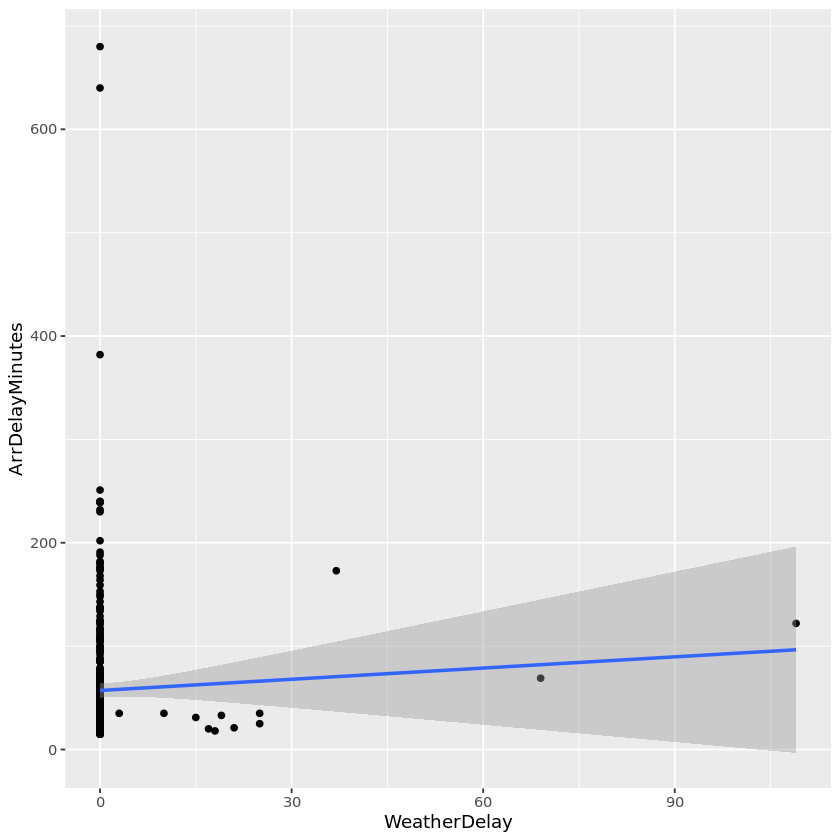

In [12]:
ggplot(data = sub_airline, mapping = aes(x = WeatherDelay, y = ArrDelayMinutes)) +
    geom_point() + 
    geom_smooth(method = "lm", na.rm = TRUE)

<p>Weather delay does not seem like a good predictor of arrival delay minutes since the regression line is close to horizontal. Also, for small values of "WeatherDelay", the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it is not a reliable variable.</p>


In the `cor()` function, you can add `use = "complete.obs"` in order to only use complete observations, that is, exclude NAs. You can examine the correlation between "WeatherDelay" and "ArrDelayMinutes" and see that it's a very weak relationship since the value is close to 0.


In [15]:
cor(sub_airline$WeatherDelay, sub_airline$ArrDelayMinutes, use = "complete.obs")

[1] 0.04019104

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="CarrierDelay", y="ArrDelayMinutes".</p>
<p>Hint: if you would like to select those columns, use the dollar sign ($) </p>
</div>



In [16]:
# Write your code below and press Shift+Enter to execute
cor(sub_airline$CarrierDelay, sub_airline$ArrDelayMinutes, use = "complete.obs")

[1] 0.7287601

<details>
    <summary>Click here for the solution.</summary>

```r
# The correlation is 0.728.
# code
cor(sub_airline$CarrierDelay, 
    sub_airline$ArrDelayMinutes, 
    use = "complete.obs")
    
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between x="CarrierDelay", y="ArrDelayMinutes", do you expect a linear relationship?</p> 
<p>Verify your results using the function of ggplot.</p>
</div>


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 2486 rows containing missing values (geom_point).”

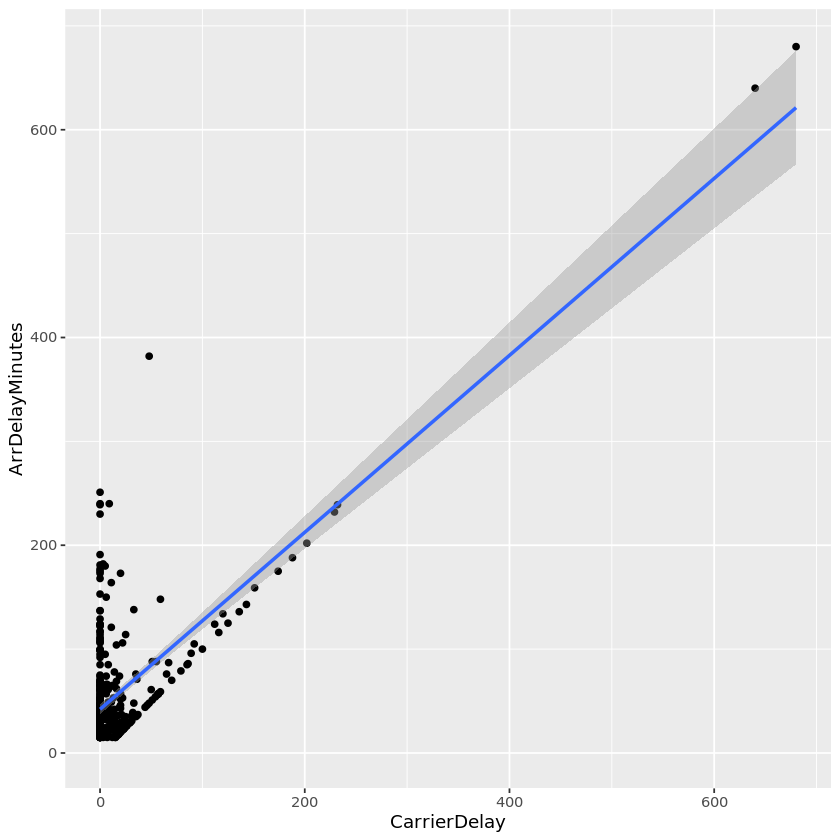

In [17]:
# Write your code below and press Shift+Enter to execute 
ggplot(data = sub_airline, mapping = aes(x = CarrierDelay, y = ArrDelayMinutes)) +
    geom_point() + 
    geom_smooth(method = "lm", na.rm = TRUE)   

<details>
    <summary>Click here for the solution.</summary>

```r
# There is a decent correlation between the variable "CarrierDelay" and "ArrDelayMinutes" since the correlation is somewhat close to 1. We can further demonstrate this using "geom_point" and "geom_smooth".

# Code
ggplot(data = sub_airline, mapping = aes(x = CarrierDelay, y = ArrDelayMinutes)) +
    geom_point() + 
    geom_smooth(method = "lm", na.rm = TRUE)   
```

</details>


<a class="anchor" id="discriptive_statistics"></a>

## 2. Descriptive Statistical Analysis


<p>When you begin to analyze data, it’s important to first explore your data before you spend time building complicated models. One easy way to do so is to calculate some descriptive statistics for your data. </p>

<p>Descriptive statistical analysis helps to describe basic features of a dataset and generates a short summary about the sample and measures of the data. </p>

Let's take a look at a couple of different useful methods. One way in which we can do this is by using the `summarize()` function in `tidyverse:dplyr()`. We introduced this method in previous modules. Method `group_by()` is often used together with `summarize()`, which summarizes each group into a single-row summary of that group. `group_by()` takes as arguments the column names that contain the categorical variables for which you want to calculate the summary statistics.

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the median (50th percentile or quartile 2)</li>
    <li>the IQR (Interquartile Range: quartile 3 minus quartile 1)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "summarize" and "group_by" as follows:


In [18]:
summary_airline_delays <- sub_airline %>%
  group_by(Reporting_Airline) %>%
  summarize(count = n(), 
            mean = mean(ArrDelayMinutes, na.rm = TRUE),
            std_dev = sd(ArrDelayMinutes, na.rm = TRUE), 
            min = min(ArrDelayMinutes, na.rm = TRUE), 
            median = median(ArrDelayMinutes, na.rm=TRUE),
            iqr = IQR(ArrDelayMinutes, na.rm = TRUE), 
            max = max(ArrDelayMinutes, na.rm = TRUE))

summary_airline_delays

Reporting_Airline,count,mean,std_dev,min,median,iqr,max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA,1096,10.12226,24.95855,0,0.0,9.25,325
AS,45,12.91111,25.59903,0,0.0,16.00,124
B6,258,18.55039,47.14758,0,0.0,13.00,382
DL,526,13.83650,48.08742,0,0.0,12.00,680
HP,14,19.21429,25.31700,0,12.5,24.50,85
PA (1),33,33.54545,118.73265,0,1.0,16.00,682
TW,185,15.59459,36.82041,0,2.0,13.00,270
UA,569,11.73462,27.09474,0,0.0,11.00,191
VX,129,14.93798,31.14125,0,0.0,15.00,188


To identify the data type of each column in a dataframe, we can use `sapply()` with `typeof`, which finds the type of something. So here, you *apply* `typeof` to every column in sub_airline.


In [19]:
sapply(sub_airline, typeof)

Month         DayOfWeek        FlightDate Reporting_Airline 
         "double"          "double"          "double"       "character" 
           Origin              Dest        CRSDepTime        CRSArrTime 
      "character"       "character"       "character"       "character" 
          DepTime           ArrTime          ArrDelay   ArrDelayMinutes 
      "character"       "character"          "double"          "double" 
     CarrierDelay      WeatherDelay          NASDelay     SecurityDelay 
         "double"          "double"          "double"          "double" 
LateAircraftDelay          DepDelay   DepDelayMinutes       DivDistance 
         "double"          "double"          "double"          "double" 
      DivArrDelay 
         "double"

<h3>Value Counts</h3>

One way you can summarize the categorical data is by using the function `count()`.
As an example, you can get the count of each reporting airline in this dataset.
We see that we have 1096 flights from AA - American Airlines, 45 flights from AS - Alaska Airlines, 258 from B6 - jetBlue airlines, etc.


In [20]:
sub_airline %>%
  count(Reporting_Airline)

Reporting_Airline,n
<chr>,<int>
AA,1096
AS,45
B6,258
DL,526
HP,14
PA (1),33
TW,185
UA,569
VX,129


<a class="anchor" id="basic_grouping"></a>

## 3. Basics of Grouping


<p>We often ask questions like: Is there any relationship between the reporting airline and the flight delays? If so, which day of the week do flights have relatively longer delay times? For example, people take flights most frequently on Monday and Friday for business trips. Would that impact how long the flight is delayed? It would be nice if we could group the data by the different reporting airline, and compare the results of these different day of week against each other.</p>

<p>In tidyverse this can be done using the "group_by" method. The group by method is used on categorical variables, it groups the data into subsets according to the different categories of that variable. You can group by a single variable or you can group by multiple variables by passing in multiple variable names. </p>

<p>Let’s say we are interested in finding the average delay minutes of flights and observe how they differ between different "Reporting_Airline" and "DayOfWeeks" variables. </p>

To do this, you can use `group_by()` to group by "Reporting_Airline" and "DayOfWeeks", then use `summarize()` to calculate the mean delay minutes. Setting `.groups = 'keep'` keeps the grouping structure, if you instead were to set it to `"drop"` then the output would be ungrouped and essentially be a regualr tibble (dataframe).


In [21]:
avg_delays <- sub_airline %>%
  group_by(Reporting_Airline, DayOfWeek) %>%
  summarize(mean_delays = mean(ArrDelayMinutes), .groups = 'keep')

head(avg_delays)

Reporting_Airline,DayOfWeek,mean_delays,.groups
<chr>,<dbl>,<dbl>,<chr>
AA,1,9.186813,keep
AA,2,6.232558,keep
AA,3,7.289157,keep
AA,4,12.387500,keep
AA,5,15.949640,keep
AA,6,8.000000,keep


The function `arrange()` will reorder the rows in an *ascending* order. However, using `arrange()` with `desc()` sorts data in *descending* order.

So now, we sort the mean_delays column by descending order using `arrange(desc())` and print the output table to see the top airlines and day of the week pairs that have the highest average arrival delays.


In [22]:
# sort the dataframe in R using multiple variables with Dplyr
sorted <- avg_delays %>% 
    arrange(desc(mean_delays))

head(sorted)

Reporting_Airline,DayOfWeek,mean_delays,.groups
<chr>,<dbl>,<dbl>,<chr>
PA (1),6,121.83333,keep
PA (1),5,36.50000,keep
TW,6,34.80952,keep
B6,7,26.82051,keep
HP,5,26.00000,keep
VX,2,25.65217,keep


To make it easier to understand, we can transform this table to a **heatmap**.

<p>A heatmap has one variable displayed along the x-axis and the other variable displayed along the y-axis. A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. </p>

<p>The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varied over space. It is a great way to plot the target variable over multiple variables and through this get visual clues of the relationship between these variables and the target. </p>

With `ggplot`, you can use `geom_tile()` to create heatmaps and use `scale_fill_gradient()` to change the coloring of the heatmap. So to interpret the heatmap below, the closer a tile is to the color red, the higher the mean arrival delay for that particualr day of the week and airline pair.


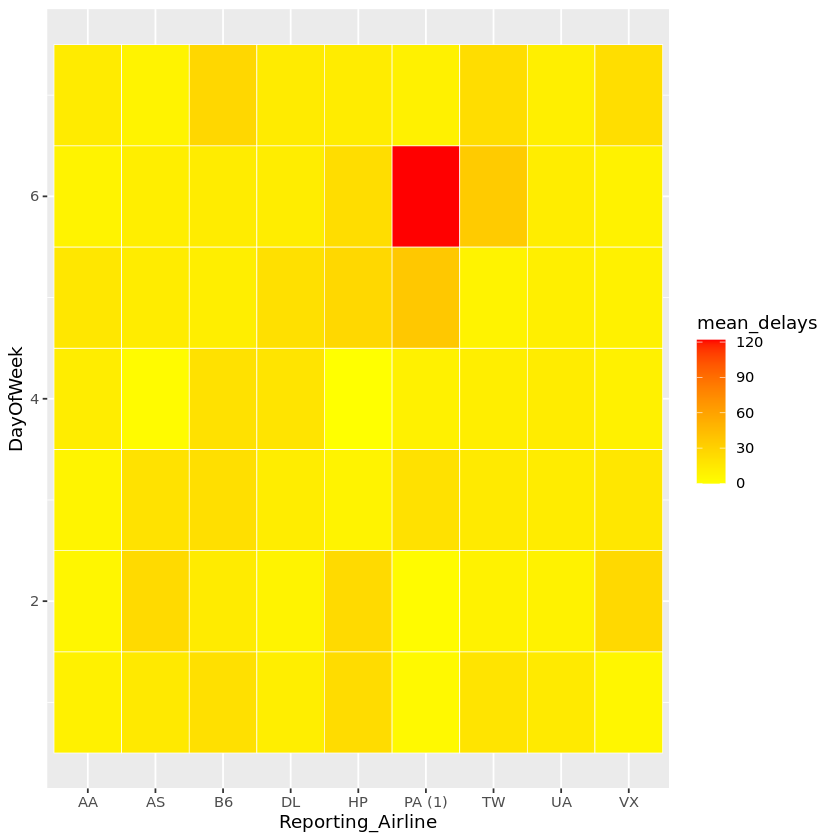

In [23]:
# The color is still hard to see and identify,  let's change the color
avg_delays %>% 
  ggplot(aes(x = Reporting_Airline, 
             y = DayOfWeek, 
             fill = mean_delays)) +
  # set the tile's borders to be white with size 0.2
  geom_tile(color = "white", size = 0.2) +
  # define gradient color scales
  scale_fill_gradient(low = "yellow", high = "red")

**BONUS Heatmap**

<p>For something more sophisticated, you can always add more blocks in your code. </p>



Attaching package: ‘lubridate’

The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union

The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



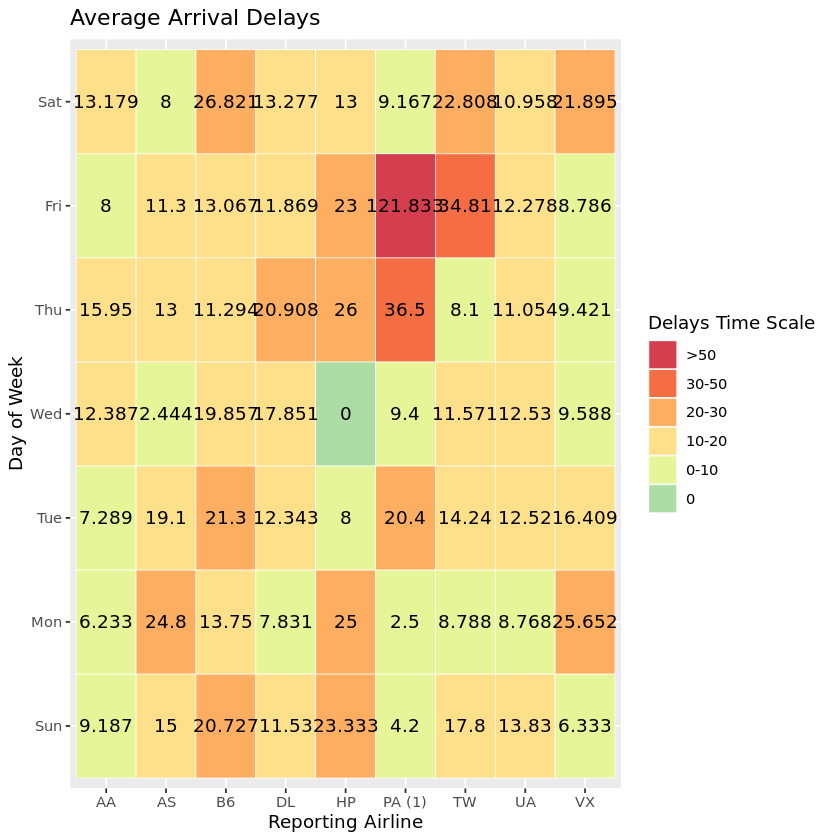

In [24]:
# This visualization will use lubridate package
library(lubridate)
# Let's take a simple average across Reporting_Airline and DayOfWeek
avg_delays <- sub_airline %>%
  group_by(Reporting_Airline, DayOfWeek) %>%
  summarize(mean_delays = mean(ArrDelayMinutes), .groups = 'keep') %>%
  # create a new variable "bins" from mean_delays
  # make the first range -0.1 to 0.1 to include zero values
  mutate(bins = cut(mean_delays,breaks = c(-0.1,0.1,10,20,30,50, max(mean_delays)),
                         labels = c("0","0-10","10-20","20-30","30-50",">50"))) %>%
  mutate(bins = factor(as.character(bins),levels = rev(levels(bins))))


ggplot(avg_delays, aes(x = Reporting_Airline, 
                      y = lubridate::wday(DayOfWeek, label = TRUE), 
                      fill = bins)) +
    geom_tile(colour = "white", size = 0.2) +
    geom_text(aes(label = round(mean_delays, 3))) +
    guides(fill = guide_legend(title = "Delays Time Scale"))+
    labs(x = "Reporting Airline",y = "Day of Week",title = "Average Arrival Delays")+
    # Define color palette for the scale
    scale_fill_manual(values = c("#d53e4f", "#f46d43", "#fdae61", "#fee08b", "#e6f598", "#abdda4"))

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" and "summarize" function to find the average "ArrDelayMinutes" of each flight based on "Reporting_Airline" ? </p>
</div>


In [29]:
# Write your code below and press Shift+Enter to execute 
sub_airline %>%
  group_by(Reporting_Airline) %>%
  summarize(mean_delays = mean(ArrDelayMinutes)) 

Reporting_Airline,mean_delays
<chr>,<dbl>
AA,10.12226
AS,12.91111
B6,18.55039
DL,13.83650
HP,19.21429
PA (1),33.54545
TW,15.59459
UA,11.73462
VX,14.93798


<details>
    <summary>Click here for the solution.</summary>

```r
# grouping results
sub_airline %>%
  group_by(Reporting_Airline) %>%
  summarize(mean_delays = mean(ArrDelayMinutes))   
```

</details>


Visualization is very important in data science and R visualization packages, namely `ggplot`, provide great freedom. We will go more in-depth in a separate R Data Visualization course.


<a class="anchor" id="correlation_causation"></a>

<h2>4. Correlation and Causation</h2>


<p>The main question we are trying to answer in this module is: "What causes flight delays?". To get a better measure of the important characteristics, we look at the correlation of these variables with the arrival delay, AKA, "ArrDelayMinutes", in other words: how is the arrival delay minutes dependent on this variable?</p>

First, let's begin with some important definitions:

*   **Correlation**: a measure of the extent of interdependence between variables.
*   **Causation**: the relationship between cause and effect between two variables.

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler than determining causation as causation may require independent experimentation.</p>


<h3>Pearson Correlation</h3>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>


Pearson Correlation is the default method of the function `cor()`, but other methods can be specified by setting `method`.  Like before we can calculate the Pearson Correlation of the "integer" or "numeric"  variables.


In [30]:
sub_airline %>% 
  select(DepDelayMinutes, ArrDelayMinutes) %>% 
  cor(method = "pearson")

,DepDelayMinutes,ArrDelayMinutes
DepDelayMinutes,1.0000000,0.9213328
ArrDelayMinutes,0.9213328,1.0000000


Sometimes, we would like to know the significant of the correlation estimate.


**P-value**:

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In R, to conduct a significance test and get the p-values, you can use `cor.test()`.


In [33]:
sub_airline %>% 
  cor.test(~DepDelayMinutes + ArrDelayMinutes, data = .) 


	Pearson's product-moment correlation

data:  DepDelayMinutes and ArrDelayMinutes
t = 126.58, df = 2853, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9155942 0.9266962
sample estimates:
      cor 
0.9213328 


**Conclusion**:

<p>See that the P-value is very small, much smaller than .001. And so we can conclude that we are certain about the strong positive correlation. </p>


<h3>Correlations between multiple variables</h3>


To calculate correlations on multiple variables, you can `select` all the variable then use the `cor()` function but set `use = "pairwise.complete.obs"` so that the correlation of every pair of variables is calculated. This computes a matrix of Pearson's r correlation coefficients for all possible pairs of columns.


In [34]:
correlation <- sub_airline %>%
  select(ArrDelayMinutes, DepDelayMinutes, 
         CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay) %>% 
  cor(use = "pairwise.complete.obs", method = "pearson")

correlation

,ArrDelayMinutes,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ArrDelayMinutes,1.00000000,0.92133281,0.72876012,0.04019104,0.26170778,0.07702208,0.41691413
DepDelayMinutes,0.92133281,1.00000000,0.75399335,0.04304843,0.07109447,0.10683841,0.44701937
CarrierDelay,0.72876012,0.75399335,1.00000000,-0.03943409,-0.18634695,-0.02396245,-0.04173491
WeatherDelay,0.04019104,0.04304843,-0.03943409,1.00000000,-0.03995573,-0.01024942,-0.02791712
NASDelay,0.26170778,0.07109447,-0.18634695,-0.03995573,1.00000000,-0.05276635,-0.15735914
SecurityDelay,0.07702208,0.10683841,-0.02396245,-0.01024942,-0.05276635,1.00000000,-0.02668880
LateAircraftDelay,0.41691413,0.44701937,-0.04173491,-0.02791712,-0.15735914,-0.02668880,1.00000000


Taking all variables into account, we can now create a heatmap that visualizes the correlation between each of the variables with one another.

Let's use the `corrplot()` function to plot an elegant graph of a correlation matrix, you may need to install the library `corrplot` first before loading it. The color scheme indicates the Pearson correlation coefficient, indicating the strength of the correlation between two variables. We can see a diagonal line with a dark blue color, indicating that all the values on this diagonal are highly correlated. This makes sense because when you look closer, the values on the diagonal are the correlation of all variables with themselves, which will always be 1.

This correlation heatmap gives us a good overview of how the different variables are related to one another and, most importantly, how these variables are related to arrival delays.


In [36]:
# Download the corrplot library first if you have not already.
 install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


corrplot 0.92 loaded


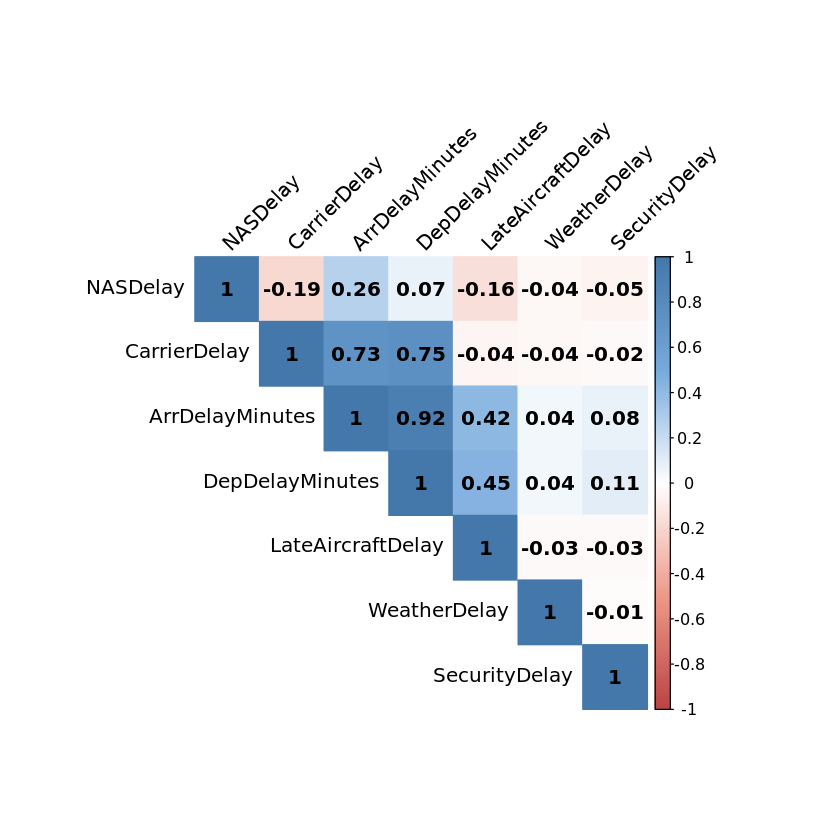

In [37]:
library(corrplot)

numerics_airline <- sub_airline %>%
  select(ArrDelayMinutes, DepDelayMinutes, CarrierDelay,
         WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay)

airlines_cor <- cor(numerics_airline, method = "pearson", use='pairwise.complete.obs')

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot(airlines_cor, method = "color", col = col(200),  
         type = "upper", order = "hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 45, #Text label color and rotation
         )

From the above correlation plot, you can see that of the features we used, "CarrierDelay", "DepDelayMinutes", and "LateAircraftDelay" have the highest correlations with "ArrDelayMinutes". The correlation between "CarrierDelay" and "ArrDelayMinutes" is 0.73, "DepDelayMinutes" and "ArrDelayMinutes" is 0.92, and so on.


<a class="anchor" id="anova"></a>

## 5. ANOVA (Analysis of Variance)


Let's say that we want to analyze a categorical variable and see the correlation among different categories. For example, consider the airline dataset, the question we may ask is, how do different categories of the reporting airline feature (as a categorical variable) impact flight delays?

The bar graph below shows the average flight delays of different airlines. The code first groups the data by airline, then finds the average arrival delay for each airline, then it plots this as a bar chart.

In `geom_bar()`, you should set `stat = "identity"` since you are passing in the y values ("Average_Delays"). If you left out this parameter then by default `stat = "count"`, which would instead count the frequency of each airline.


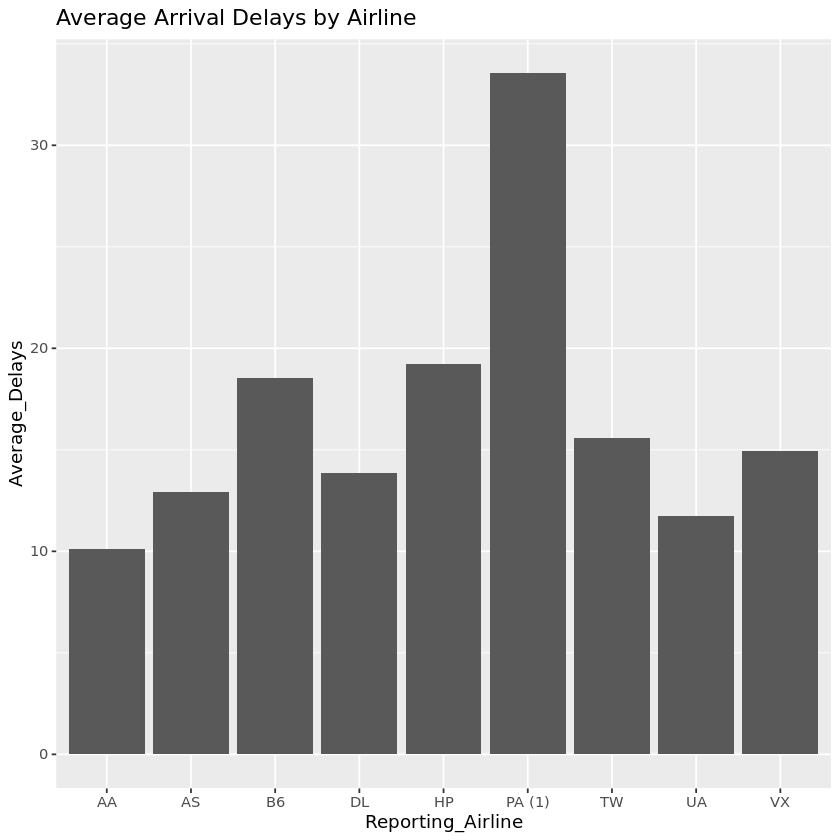

In [38]:
summary_airline_delays <- sub_airline %>%
    group_by(Reporting_Airline) %>%
    summarize(Average_Delays = mean(ArrDelayMinutes, na.rm = TRUE))

summary_airline_delays %>%  
    ggplot(aes(x = Reporting_Airline, y = Average_Delays)) + 
    geom_bar(stat = "identity") +
    ggtitle("Average Arrival Delays by Airline")

To analyze categorical variables such as the "Reporting_Airline" variable, we can use a method such as the ANOVA method.

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

*   **F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

*   **P-value**: The p-value tells you how statistically significant the calculated score value is.</p>

If our `ArrDelay` variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

**American Airline (AA) and Alaska Airline (AS)**

The ANOVA test can be performed in base R's `stats` package using the `aov()` function. You can pass in the arrival delay data of the two airline groups that we want to compare and it calculates the ANOVA results.

In this first example, you can compare American Airline and Alaska Airline. The results confirm what we guessed at first. The flight delay between "AA" and "AS" are not significantly different, as the F score (0.13) is less than 1 and p-value is larger than 0.05.


In [ ]:
aa_as_subset <- sub_airline %>%
  select(ArrDelay, Reporting_Airline) %>%
  filter(Reporting_Airline == 'AA' | Reporting_Airline == 'AS')

ad_aov <- aov(ArrDelay ~ Reporting_Airline, data = aa_as_subset)
summary(ad_aov)

**American Airline (AA) and Pan Am Airline (PA (1))**

As another example, you can compare American Airline and Pan Am Airline.
From the below output, the arrival delay between "AA" and "PA (1)" are significantly different, since the F-score is very large (F = 17.95) and the p-value is 0.0000245 which is smaller than 0.05. All in all, we can say that there is a strong correlation between a categorical variable and other variables, if the ANOVA test gives us a large F-test value and a small p-value.


In [ ]:
aa_pa_subset <- sub_airline %>%
  select(ArrDelay, Reporting_Airline) %>%
  filter(Reporting_Airline == 'AA' | Reporting_Airline == 'PA (1)')

ad_aov <- aov(ArrDelay ~ Reporting_Airline, data = aa_pa_subset)
summary(ad_aov)

<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the arrival delay (ArrDelay). We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>DepDelayMinutes</li>
    <li>CarrierDelay</li>
    <li>LateAircraftDelay</li>
</ul>

Categorical variables:

<ul>
    <li>ReportingAirline</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

<h1>Thank you for completing this notebook</h1>


<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/yiwen-li-47a019119/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2022-01-01" target="_blank">Yiwen Li</a> and <a href="https://www.linkedin.com/in/gabrieladequeiroz/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2022-01-01" target="_blank">Gabriela de Queiroz</a>.

<a href="https://www.linkedin.com/in/yiwen-li-47a019119/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2022-01-01" target="_blank">Yiwen Li</a> is a developer advocate and data scientist at IBM. She has been creating online content such as code patterns, tutorials, and blogs demonstrating the potential of products and services offered by IBM (like Watson Studio, Machine learning, Model Asset eXchange, Data Asset eXchange, etc.). She holds dual degree, including BS in Probability and Statistics and BA in Economics from the University of California, San Diego.

<a href="https://www.linkedin.com/in/gabrieladequeiroz/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2022-01-01" target="_blank">Gabriela de Queiroz</a> is a Sr. Engineering & Data Science Manager at IBM where she manages and leads a team of developers working on Data & AI Open Source projects. She works to democratize AI by building tools and launching new open source projects.
She is the founder of AI Inclusive, a global organization that is helping increase the representation and participation of gender minorities in Artificial Intelligence. She is also the founder of R-Ladies, a worldwide organization for promoting diversity in the R community with more than 190 chapters in 50+ countries.
She has worked in several startups and where she built teams, developed statistical models, and employed a variety of techniques to derive insights and drive data-centric decisions


Copyright © 2021 IBM Corporation. All rights reserved.
